In [ ]:
import os
from fmlib.io import zenodo_get_and_unzip, load_fusions_from_fusionaitxt
from pathlib import Path
import pandas as pd

data_folder = Path('download/dataset')
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    zenodo_get_and_unzip('15655666','dataset.zip','download')





In [25]:
import ai


# Load all data as before
nt_train = ai.load_fusion_embedings(data_folder/'nt_train_seq1.csv', data_folder/'nt_train_seq2.csv', data_folder/'fusionai_train_target.csv')
nt_test_full = ai.load_fusion_embedings(data_folder/'nt_test_seq1.csv', data_folder/'nt_test_seq2.csv', data_folder/'fusionai_test_target.csv')
evo_train = ai.load_fusion_embedings(data_folder/'evo_train_seq1.csv', data_folder/'evo_train_seq2.csv', data_folder/'fusionai_train_target.csv')
evo_test_full = ai.load_fusion_embedings(data_folder/'evo_test_seq1.csv', data_folder/'evo_test_seq2.csv', data_folder/'fusionai_test_target.csv')
hyena_train = ai.load_fusion_embedings(data_folder/'hyena_train_seq1.csv', data_folder/'hyena_train_seq2.csv', data_folder/'fusionai_train_target.csv')
hyena_test_full = ai.load_fusion_embedings(data_folder/'hyena_test_seq1.csv', data_folder/'hyena_test_seq2.csv', data_folder/'fusionai_test_target.csv')
bert_train = ai.load_fusion_embedings(data_folder/'bert_train_seq1.csv', data_folder/'bert_train_seq2.csv', data_folder/'fusionai_train_target.csv')
bert_test_full = ai.load_fusion_embedings(data_folder/'bert_test_seq1.csv', data_folder/'bert_test_seq2.csv', data_folder/'fusionai_test_target.csv')



nt_test, nt_val = ai.split_test(nt_test_full)
evo_test, evo_val = ai.split_test(evo_test_full)
hyena_test, hyena_val = ai.split_test(hyena_test_full)
bert_test, bert_val = ai.split_test(bert_test_full)



In [17]:
input_dim = nt_train[0].shape[1]
model = ai.get_fully_connected(input_dim)
nt_model, nt_history = ai.train_adam(nt_train, nt_val, model,num_epochs=300)

input_dim = evo_train[0].shape[1]
model = ai.get_fully_connected(input_dim)
evo_model, evo_history = ai.train_adam(evo_train, evo_val, model,num_epochs=300)

input_dim = bert_train[0].shape[1]
model = ai.get_fully_connected(input_dim)
bert_model, bert_history = ai.train_adam(bert_train, bert_val, model,num_epochs=300)

input_dim = hyena_train[0].shape[1]
model = ai.get_fully_connected(input_dim)
hyena_model, hyena_history = ai.train_adam(hyena_train, hyena_val, model,num_epochs=300)


evaluation_results = {}

print("\nEvaluating NT Model:")
evaluation_results['NT Model'] = ai.evaluate_model(nt_model, nt_test)

print("\nEvaluating Evo Model:")
evaluation_results['Evo Model'] = ai.evaluate_model(evo_model, evo_test)

print("\nEvaluating BERT Model:")
evaluation_results['BERT Model'] = ai.evaluate_model(bert_model, bert_test)

print("\nEvaluating Hyena Model:")
evaluation_results['Hyena Model'] = ai.evaluate_model(hyena_model, hyena_test)


# Create a DataFrame for better visualization





Validation accuracy: 95.27% at epoch 294

Validation accuracy: 90.09% at epoch 298

Validation accuracy: 63.67% at epoch 300

Validation accuracy: 82.37% at epoch 298

Evaluating NT Model:
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluating Evo Model:
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Evaluating BERT Model:
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Evaluating Hyena Model:
244/244 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
custom_kernels = [    
    {'name': 'Linear', 'kernel': 'linear', 'C': 1.0},
    {'name': 'RBF', 'kernel': 'rbf', 'C': 1.0, 'gamma': 'scale'},
]
evaluation_results_svm = {}

print("\n Evaluating NT Model with SVM:")
evaluation_results_svm['NT Model'] = ai.train_and_evaluate_svm(nt_train, nt_test, nt_val,max_samples=40000, kernels=custom_kernels)
print("\n Evaluating Evo Model with SVM:")
evaluation_results_svm['Evo Model'] = ai.train_and_evaluate_svm(evo_train, evo_test, evo_val,max_samples=40000, kernels=custom_kernels)
print("\n Evaluating BERT Model with SVM:")
evaluation_results_svm['BERT Model'] = ai.train_and_evaluate_svm(bert_train, bert_test, bert_val,max_samples=40000, kernels=custom_kernels)
print("\n Evaluating Hyena Model with SVM:")
evaluation_results_svm['Hyena Model'] = ai.train_and_evaluate_svm(hyena_train, hyena_test, hyena_val,max_samples=40000, kernels=custom_kernels)




 Evaluating NT Model with SVM:
Training SVM with 36301 samples (from 36301 total)...


Training RBF SVM...
RBF SVM accuracy: 0.966

Best performing kernel: RBF with accuracy: 0.966
SVM training completed. Final accuracy: 0.966

 Evaluating Evo Model with SVM:
Training SVM with 36301 samples (from 36301 total)...
Training RBF SVM...
RBF SVM accuracy: 0.922

Best performing kernel: RBF with accuracy: 0.922
SVM training completed. Final accuracy: 0.922

 Evaluating BERT Model with SVM:
Training SVM with 36301 samples (from 36301 total)...
Training RBF SVM...
RBF SVM accuracy: 0.770

Best performing kernel: RBF with accuracy: 0.770
SVM training completed. Final accuracy: 0.770

 Evaluating Hyena Model with SVM:
Training SVM with 36301 samples (from 36301 total)...
Training RBF SVM...
RBF SVM accuracy: 0.896

Best performing kernel: RBF with accuracy: 0.896
SVM training completed. Final accuracy: 0.896


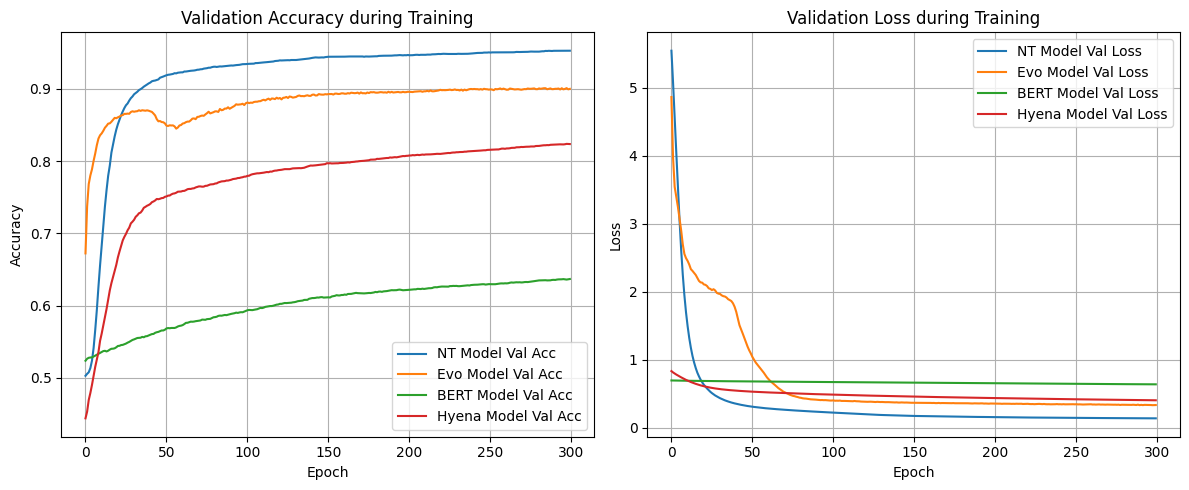


Model Evaluation Summary Table:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
NT Model,94.805863,0.948080,0.948059,0.948059,0.988803
Evo Model,90.125996,0.901280,0.901260,0.901260,0.959409
BERT Model,62.355361,0.625321,0.623554,0.622042,0.674598
Hyena Model,81.704808,0.819296,0.817048,0.816756,0.896480



Confusion Matrix for NT Model:


,Pred 0,Pred 1
True 0,3686,215
True 1,189,3688



Confusion Matrix for Evo Model:


,Pred 0,Pred 1
True 0,3504,397
True 1,371,3506



Confusion Matrix for BERT Model:


,Pred 0,Pred 1
True 0,2677,1224
True 1,1704,2173



Confusion Matrix for Hyena Model:


,Pred 0,Pred 1
True 0,3028,873
True 1,550,3327


In [18]:
import matplotlib.pyplot as plt

evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')

def plot_history(histories, model_names):
    plt.figure(figsize=(12, 5))

    # Plot Validation Accuracy
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=f'{model_names[i]} Val Acc')
    plt.title('Validation Accuracy during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Validation Loss
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['val_loss'], label=f'{model_names[i]} Val Loss')
    plt.title('Validation Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

histories = [nt_history, evo_history, bert_history, hyena_history]
model_names = ['NT Model', 'Evo Model', 'BERT Model', 'Hyena Model','SVM']

plot_history(histories, model_names)

print("\nModel Evaluation Summary Table:")
display(evaluation_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']])

# Print confusion matrices for each model
for model_name, metrics in evaluation_results.items():
    print(f"\nConfusion Matrix for {model_name}:")
    conf_matrix = metrics['Confusion Matrix']
    df_cm = pd.DataFrame(conf_matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
    display(df_cm)

In [19]:



# You can also print the confusion matrices separately if needed

evaluation_df_svm = pd.DataFrame.from_dict(evaluation_results_svm, orient='index')
print("\nModel Evaluation Summary Table:")
display(evaluation_df_svm[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']])

# Print confusion matrices for each model
for model_name, metrics in evaluation_results_svm.items():
    print(f"\nConfusion Matrix for {model_name}:")
    conf_matrix = metrics['Confusion Matrix']
    df_cm = pd.DataFrame(conf_matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
    display(df_cm)
    




Model Evaluation Summary Table:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
NT Model,0.965801,0.969571,0.961568,0.965553,0.994538
Evo Model,0.922217,0.922085,0.921847,0.921966,0.976600
BERT Model,0.769992,0.780947,0.748517,0.764388,0.851846
Hyena Model,0.895732,0.873174,0.925200,0.898435,0.961830



Confusion Matrix for NT Model:


,Pred 0,Pred 1
True 0,3784,117
True 1,149,3728



Confusion Matrix for Evo Model:


,Pred 0,Pred 1
True 0,3599,302
True 1,303,3574



Confusion Matrix for BERT Model:


,Pred 0,Pred 1
True 0,3087,814
True 1,975,2902



Confusion Matrix for Hyena Model:


,Pred 0,Pred 1
True 0,3380,521
True 1,290,3587


In [14]:

# You can also print the confusion matrices separately if needed

print("\nModel Evaluation Summary Table:")
display(evaluation_results[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']])

# Print confusion matrices for each model
for model_name, metrics in evaluation_results.items():
    print(f"\nConfusion Matrix for {model_name}:")
    conf_matrix = metrics['Confusion Matrix']
    df_cm = pd.DataFrame(conf_matrix, index=['True 0', 'True 1'], columns=['Pred 0', 'Pred 1'])
    display(df_cm)
    


Model Evaluation Summary Table:


TypeError: unhashable type: 'list'


 Evaluating NT Model with SVM:
Training SVM with 50 samples (from 50 total)...
Training Linear SVM...
Linear SVM accuracy: 0.902

Best performing kernel: Linear with accuracy: 0.902
SVM training completed. Final accuracy: 0.902

 Evaluating NT Model with SVM:
Training SVM with 200 samples (from 200 total)...
Training Linear SVM...
Linear SVM accuracy: 0.928

Best performing kernel: Linear with accuracy: 0.928
SVM training completed. Final accuracy: 0.928

 Evaluating NT Model with SVM:
Training SVM with 400 samples (from 400 total)...
Training Linear SVM...
Linear SVM accuracy: 0.937

Best performing kernel: Linear with accuracy: 0.937
SVM training completed. Final accuracy: 0.937

 Evaluating NT Model with SVM:
Training SVM with 800 samples (from 800 total)...
Training Linear SVM...
Linear SVM accuracy: 0.938

Best performing kernel: Linear with accuracy: 0.938
SVM training completed. Final accuracy: 0.938

 Evaluating NT Model with SVM:
Training SVM with 1200 samples (from 1200 tota

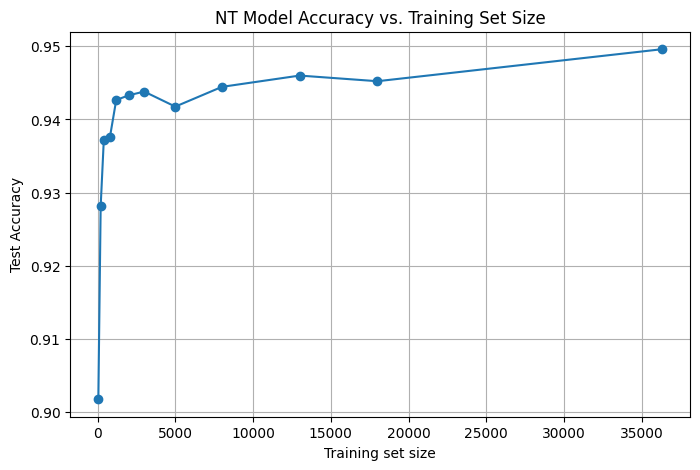

In [ ]:
import torch
# Iterative training with increasing nt_train data sizes
batch_sizes = [50, 200, 400, 800, 1200, 2000, 4000, 8000, 16000, 24000,36302]
nt_accuracies = []


for size in batch_sizes:
    # Slice the training data
    # Shuffle nt_train before slicing
    torch.manual_seed(42)
    indices = torch.randperm(nt_train[0].shape[0])
    x_train = nt_train[0][indices][:size]
    y_train = nt_train[1][indices][:size]
    
    
    # Create a new model for each size to avoid weight carryover
    # input_dim = x_train.shape[1]
    # model = ai.get_fully_connected(input_dim)
    # nt_model, nt_history = ai.train_adam((x_train, y_train), nt_test, model, num_epochs=200)
    # evaluation_results = ai.evaluate_model(nt_model, nt_test)
    
    custom_kernels = [    
        {'name': 'Linear', 'kernel': 'linear', 'C': 1.0},
    ]


    print("\n Evaluating NT Model with SVM:")
    evaluation_results = ai.train_and_evaluate_svm((x_train, y_train), nt_test,max_samples=size, kernels=custom_kernels)
    
    # Evaluate accuracy on nt_test
    
    nt_accuracies.append(evaluation_results['Accuracy'])  # Get accuracy from evaluation results

# Plot accuracy vs. training set size
plt.figure(figsize=(8,5))
plt.plot(batch_sizes, nt_accuracies, marker='o')
plt.xlabel('Training set size')
plt.ylabel('Test Accuracy')
plt.title('NT Model Accuracy vs. Training Set Size')
plt.grid(True)
plt.show()